<a href="https://colab.research.google.com/github/alizmarossy/FAKT_ML/blob/main/FAKT_kurzus_4_2_ipynb_m%C3%A1solata_m%C3%A1solata.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AlexNet elkészítése

### CIFAR10 adatbázis importálása

In [1]:
from tensorflow import keras

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

170508288/170498071 [==============================] - 3s 0us/step


In [3]:
x_train[0].shape

(32, 32, 3)

In [4]:
class_names = ['repülő', 'autó', 'madár', 'macska', 'szarvas', 'kutya', 'béka', 'ló', 'hajó', 'kamion']

In [5]:
import matplotlib.pyplot as plt

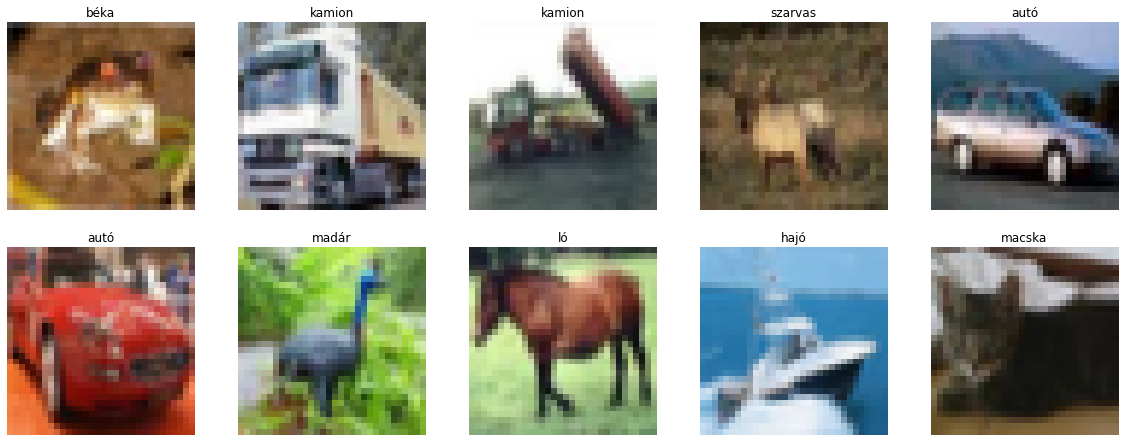

In [6]:
plt.figure(figsize=(20,20))
for i in range(10):
    image = x_train[i]
    label = y_train[i]
    ax = plt.subplot(5,5,i+1)
    plt.title(class_names[label[0]])
    plt.imshow(image)
    plt.axis('off')


## Adatok formálása

In [7]:
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [8]:
from tensorflow.keras.utils import to_categorical

In [9]:
y_train = to_categorical(y_train, num_classes=len(class_names))
y_test = to_categorical(y_test, num_classes=len(class_names))

In [10]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

## AlexNet elkészítése

In [11]:
from tensorflow.keras.layers import Conv2D, Input, MaxPooling2D, Flatten, Dense, Dropout

In [12]:
input = Input(shape=(32,32,3)) # A baj ott kezdődött, hogy túl nagy a hálónk ilyen kis méretű képekhez. Ha megnézitek a summaryt, a konvolúciós rétegek közti feature mapek (3D mátrixok) 2x2xmélység méretűek, ami hát elég kicsi. Megoldásként kikommentezhetünk jó pár réteget, még így is lecsökken 2x2-re de így már tud tanulni a háló. Earlystopping patiencenek nyugodtan adhattok magasabb értéket, akár 20-50 et is, mert ha végiggondoljátok bajt nem okozhattok vele, csak a tanulási idő nő max meg ha kimentünk egy lokális optimumból és tovább tud tanulni.

x = Conv2D(filters=64, kernel_size=5, strides=4, activation='relu', padding='same')(input)
x = MaxPooling2D(pool_size=2, strides=2)(x)
# x = Conv2D(filters=256, kernel_size=5, activation='relu', padding='same')(x)
# x = MaxPooling2D(pool_size=2, strides=2)(x)
# x = Conv2D(filters=384, kernel_size=3, activation='relu', padding='same')(x)
# x = Conv2D(filters=384, kernel_size=3, activation='relu', padding='same')(x)
# x = Conv2D(filters=192, kernel_size=3, activation='relu', padding='same')(x)
x = MaxPooling2D(pool_size=2, strides=2)(x)
x = Flatten()(x)

# x = Dense(4096, activation='relu')(x)
# x = Dropout(0.2)(x)
x = Dense(4096, activation='relu')(x)
x = Dropout(0.4)(x)

output = Dense(len(class_names), activation='softmax')(x)

In [13]:
AlexNet = keras.Model(input, output)

In [14]:
AlexNet.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 8, 8, 64)          4864      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 4, 4, 64)         0         
 )                                                               
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 2, 2, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 256)               0         
                                                                 
 dense (Dense)               (None, 4096)              105267

In [15]:
AlexNet.compile('adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [16]:
from tensorflow.keras.callbacks import EarlyStopping

In [17]:
early_stopping_callback = EarlyStopping(patience=5, restore_best_weights=True)

In [18]:
AlexNet.fit(x_train, y_train, epochs=7, validation_split=0.1, callbacks=[early_stopping_callback])

Epoch 1/7
1407/1407 [==============================] - 20s 7ms/step - loss: 1.6839 - accuracy: 0.3824 - val_loss: 1.4936 - val_accuracy: 0.4614
Epoch 2/7
1407/1407 [==============================] - 8s 6ms/step - loss: 1.4486 - accuracy: 0.4788 - val_loss: 1.3743 - val_accuracy: 0.4964
Epoch 3/7
1407/1407 [==============================] - 9s 6ms/step - loss: 1.3410 - accuracy: 0.5160 - val_loss: 1.3254 - val_accuracy: 0.5274
Epoch 4/7
1407/1407 [==============================] - 10s 7ms/step - loss: 1.2784 - accuracy: 0.5420 - val_loss: 1.2563 - val_accuracy: 0.5592
Epoch 5/7
1407/1407 [==============================] - 9s 7ms/step - loss: 1.2226 - accuracy: 0.5611 - val_loss: 1.2962 - val_accuracy: 0.5458
Epoch 6/7
1407/1407 [==============================] - 9s 6ms/step - loss: 1.1767 - accuracy: 0.5783 - val_loss: 1.2060 - val_accuracy: 0.5736
Epoch 7/7
1407/1407 [==============================] - 9s 7ms/step - loss: 1.1327 - accuracy: 0.5981 - val_loss: 1.2169 - val_accuracy: 0.57

## Modell predikciók

### Eredeti teszt adatbázison

In [19]:
x_test.shape[0] # Van ennyi darab tesztképünk

10000

In [20]:
predictions = AlexNet.predict(x_test)

In [21]:
type(predictions) # Egy nagy numpy array az egész

numpy.ndarray

In [22]:
predictions.shape # Két dimenziós, áll 10000 darab 10 hosszúságú vektorból. Azért 10 darab, mert 10 neuron volt az output rétegünk. Vagyis amit itt látunk, az a 10 output neuron értéke, amik a mi predikcióink minden egyes osztályra. 10 osztály, 10 neuron, 10 predikált 0-1 közti szám, vagyis valószínűség!

(10000, 10)

In [23]:
predictions[0] # Vizsgáljuk meg a legelső tesztkép predkcióját. Látszik a 10 darab valószínűség. 

array([0.02430553, 0.01248697, 0.05210977, 0.3848617 , 0.08468411,
       0.3001552 , 0.01331887, 0.09203307, 0.02940614, 0.00663869],
      dtype=float32)

In [24]:
predictions[0].sum() # Ellenőrizhetjük hogy a softmax jól működik-e, valóban 1 az összes osztály valószínűségeinek összege.

1.0

In [25]:
predictions[0].max() # Nekünk a legmagasabb valószínűség fog kelleni, emellett döntött a modell. Látjuk hogy 10%-ig biztos benne. 

0.3848617

In [26]:
import numpy as np

In [27]:
np.argmax(predictions[0]) # Mivel minden neuron egy osztály reprezentál, így a legmagasabb érték sorszáma visszaadja az osztályt. Ebben az esetben a 3. 

3

In [28]:
class_names[np.argmax(predictions[0])] # Ha indexként felhasználjuk, akkor ki is írhatjuk, mi volt ez az osztály. 

'macska'

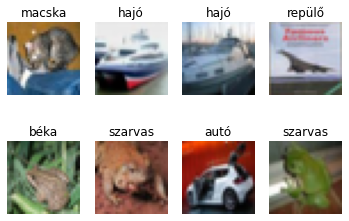

In [29]:
# Pár predikciót nézzünk meg vizuálisan is felhasználva az eddigi tudásunkat
for i in range(8):
    image = x_test[i]
    highest_neuron = np.argmax(predictions[i])
    predicted_class = class_names[highest_neuron]

    ax = plt.subplot(2, 4, i+1)
    plt.imshow(image)
    plt.title(predicted_class)
    plt.axis('off')

### Saját képekkel

In [36]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [37]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [33]:
from PIL import Image
import numpy as np

In [39]:
image = Image.open('/content/drive/My Drive/DSC_0278.JPG') # Betöljük

In [40]:
image = image.resize((32, 32)) # Átméretezzük

In [41]:
image = np.asarray(image)/255 # Numpy array-á változtatjuk és normalizáljuk 

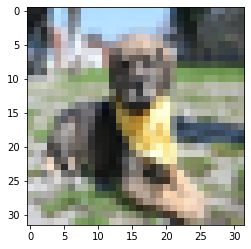

In [42]:
plt.imshow(image)

In [43]:
image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2] )) # 1 a batch méretűvé tesszük, hogy a modell megkajálja

In [44]:
prediction = AlexNet.predict(image) # Predikálunk vele

In [45]:
confidence = round(prediction.max()*100) # Megnézzük mennyire tartja valószínűnek

In [46]:
confidence # Elég biztos benne

28

In [47]:
predicted_class = class_names[np.argmax(prediction)]

In [48]:
print(f'A modell szerint a képen egy {predicted_class} van. \n Legalábbis {confidence}%-ig biztos benne.') # \n-el tudtok új sort kezdeni a printben

A modell szerint a képen egy kamion van. 
 Legalábbis 28%-ig biztos benne.


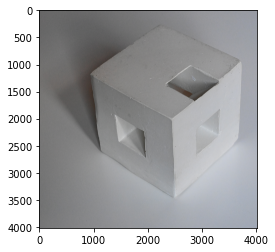

In [50]:
image = Image.open('/content/drive/My Drive/DSC_2153.JPG')
plt.imshow(image)

A modell szerint a képen egy repülő van. 
 Legalábbis 40%-ig biztos benne.


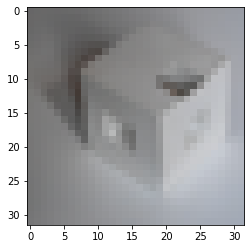

In [54]:
image = image.resize((32, 32))
image = np.asarray(image)/255
plt.imshow(image)
image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2] ))
prediction = AlexNet.predict(image)
confidence = round(prediction.max()*100)
predicted_class = class_names[np.argmax(prediction)]
print(f'A modell szerint a képen egy {predicted_class} van. \n Legalábbis {confidence}%-ig biztos benne.')

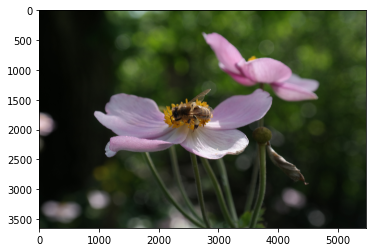

In [57]:
image = Image.open('/content/drive/My Drive/07290028.JPG')
plt.imshow(image)

A modell szerint a képen egy béka van. 
 Legalábbis 41%-ig biztos benne.


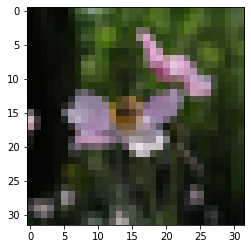

In [58]:
image = image.resize((32, 32))
image = np.asarray(image)/255
plt.imshow(image)
image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2] ))
prediction = AlexNet.predict(image)
confidence = round(prediction.max()*100)
predicted_class = class_names[np.argmax(prediction)]
print(f'A modell szerint a képen egy {predicted_class} van. \n Legalábbis {confidence}%-ig biztos benne.')

Végre működik, köszönöm a segítséget!